In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import plotly.express as px

# Compreensão de dados

A fase de compreensão dos dados do CRISP-DM envolve examinar mais de perto os dados disponíveis. 

## 1.   Base de dados fornecida pela Embrapa

Reune os dados da produção e abate dos animais no programa Precoce MS, além dos dados do clima do estado do Mato Grosso do Sul, índices de vegetação e preços das commodities.

In [28]:
path = '../../dados/TAB_MODELAGEM_PCTITU22-06-21.csv'
df = pd.read_csv(path, sep=';', encoding = "ISO-8859-1")

/home/ygobrito/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,112,113) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
print('A base de dados apresenta {} registros e {} características.'.format(df.shape[0], df.shape[1]))

A base de dados apresenta 1107689 registros e 125 características.


In [17]:
#para mostrar todas a linhas e colunas
pd.set_option('display.max_columns',999)
pd.set_option("display.max_rows", 999)

In [7]:
df.sample(5)

,ID_ANIMAL,EstabelecimentoMunicipio,DataAbate,EstabelecimentoIdentificador,IdentificadorLote,Tipificacao,Maturidade,Acabamento,Peso,MotivoDesclassificacao,QuestionarioClassificacaoEstabel,QuestionarioPossuiOutrosIncentiv,QuestionarioPraticaRecuperacaoPa,FERTIIRRIGACAO,ILP,ILPF,IFP,QuestionarioFabricaRacao,identificacao individual,regua de manejo,BPA,participa de aliancas mercadolog,qual alianca,"boa cobertura vegetal, com baixa",erosaoo laminar ou em sulco igua,rastreamento SISBOV,Lista Trace,data12m,data6m,data3m,data1m,data7d,tot7d_Chuva,med7d_TempInst,med7d_TempMax,med7d_TempMin,med7d_UmidInst,med7d_UmidMax,med7d_UmidMin,med7d_VelVentoMax,med7d_formITUinst,med7d_formITUmax,med7d_NUM_PIXELS,med7d_NDVI,med7d_EVI,med7d_preR_soja,med7d_preR_milho,med7d_preR_boi,tot1m_Chuva,med1m_TempInst,med1m_TempMax,med1m_TempMin,med1m_UmidInst,med1m_UmidMax,med1m_UmidMin,med1m_VelVentoMax,med1m_formITUinst,med1m_formITUmax,med1m_NUM_PIXELS,med1m_NDVI,med1m_EVI,med1m_preR_soja,med1m_preR_milho,med1m_preR_boi,tot3m_Chuva,med3m_TempInst,med3m_TempMax,med3m_TempMin,med3m_UmidInst,med3m_UmidMax,med3m_UmidMin,med3m_VelVentoMax,med3m_formITUinst,med3m_formITUmax,med3m_NUM_PIXELS,med3m_NDVI,med3m_EVI,med3m_preR_soja,med3m_preR_milho,med3m_preR_boi,tot6m_Chuva,med6m_TempInst,med6m_TempMax,med6m_TempMin,med6m_UmidInst,med6m_UmidMax,med6m_UmidMin,med6m_VelVentoMax,med6m_formITUinst,med6m_formITUmax,med6m_NUM_PIXELS,med6m_NDVI,med6m_EVI,med6m_preR_soja,med6m_preR_milho,med6m_preR_boi,tot12m_Chuva,med12m_TempInst,med12m_TempMax,med12m_TempMin,med12m_UmidInst,med12m_UmidMax,med12m_UmidMin,med12m_VelVentoMax,med12m_formITUinst,med12m_formITUmax,med12m_NUM_PIXELS,med12m_NDVI,med12m_EVI,med12m_preR_soja,med12m_preR_milho,med12m_preR_boi,cnt7d_CL_ITUmax,cnt7d_CL_ITUinst,cnt1m_CL_ITUmax,cnt1m_CL_ITUinst,cnt3m_CL_ITUmax,cnt3m_CL_ITUinst,cnt6m_CL_ITUmax,cnt6m_CL_ITUinst,cnt12m_CL_ITUmax,cnt12m_CL_ITUinst,ANO,CATEGORIA,classificacao
136391,136392,RIBAS DO RIO PARDO,15SEP2017,4534,19308,Macho INTEIRO,Dente de leite,Gordura Mediana - acima de 3 a atÃ© 6 mm de es...,"272,40",CLASSIFICADO,30.0,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,SIM,SIM,SIM,NÃO,SIM,ASPNP,SIM,NÃO,SIM,SIM,14SEP2016,16MAR2017,14JUN2017,15AUG2017,07SEP2017,0.000,"25,66","36,92","15,43","49,41","87,33","17,17","12,66","72,24","95,45","106541,00","0,38","0,23","70,13","28,43","144,62","94,34","24,06","32,78","16,98","65,38","92,41","34,55","12,17","71,67","89,45","106541,00","0,39","0,23","69,71","27,65","140,94","135,14","22,47","31,66","15,05","65,27","93,03","31,95","12,94","69,55","87,71","106541,00","0,43","0,24","70,50","26,76","131,18","509,81","23,14","31,57","16,75","71,01","94,87","38,22","12,06","71,10","87,89","106541,00","0,51","0,30","69,22","27,67","133,81","1248,95","23,65","31,89","17,57","71,79","94,83","38,96","12,11","71,93","88,44","106541,00","0,55","0,33","70,71","30,06","137,42","0,0000","0,8333","0,0690","0,8276","0,0690","0,8276","0,0409","0,7076","0,0335","0,6151",2017,AAA,1
227934,227935,JARAGUARI,08NOV2017,4618,23358,Macho INTEIRO,Dois dentes,Gordura Mediana - acima de 3 a atÃ© 6 mm de es...,"328,00",CLASSIFICADO,26.0,NÃO,SIM,NÃO,SIM,NÃO,NÃO,SIM,SIM,SIM,NÃO,NÃO,NaN,SIM,NÃO,SIM,SIM,07NOV2016,09MAY2017,07AUG2017,08OCT2017,31OCT2017,2.975,"23,26","30,10","18,33","69,92","87,50","45,25","17,95","71,24","84,27","10915,00","0,57","0,38","73,37","32,56","139,66","173,61","24,84","31,23","19,95","66,14","82,26","44,84","21,84","72,93","85,00","10915,00","0,53","0,35","72,22","31,86","140,20","387,59","25,01","31,72","19,80","59,53","76,06","39,12","21,34","72,31","84,48","10915,00","0,45","0,28","70,80","29,39","139,91","646,85","23,94","30,43","19,07","62,26","77,82","41,35","20,29","71,24","82,89","10915,00","0,49","0,29","70,45","28,09","134,47","1453,43","23,87","30,30","19,17","65,52","81,28","43,32","20,50","71,50","83,30","10915,00","0,55","0,33","70,84","30,22","138,04","0,0000","0,5000","0,0000","0,4839","0,0323","0,6129","0,0492","0,6885","0,0418","0,6720",2017,AA,1
1106364,1106365,RIBAS

In [29]:
df['ANO'].value_counts()

2018    725578
2017    335873
2019     46238
Name: ANO, dtype: int64

### Ajuste nos nomes das colunas

Padrão utilizado será letras minúsculas separadas por '_', sem espaços em branco.

In [9]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [10]:
novos_nomes_colunas = { 'estabelecimentomunicipio': 'estabelecimento_municipio', 
                        'dataabate':'data_abate',
                        'estabelecimentoidentificador':'estabelecimento_identificador',
                        'identificadorlote':'identificador_lote',
                        'motivodesclassificacao':'motivo_desclassificacao', 
                        'questionarioclassificacaoestabel': 'classificacao_estabelecimento', 
                        'questionariopossuioutrosincentiv': 'outros_incentivos', 
                        'questionariopraticarecuperacaopa': 'pratica_recuperacao_pastagem',
                        'questionariofabricaracao': 'fabrica_racao',
                        'participa_de_aliancas_mercadolog': 'participa_aliancas_mercadologicas',
                        'boa_cobertura_vegetal,_com_baixa': 'boa_cobertura_vegetal',
                        'erosaoo_laminar_ou_em_sulco_igua': 'erosao_laminar_ou_sulco_20'
                      }

In [11]:
df.rename(columns=novos_nomes_colunas, inplace=True)

## 2. Descrição dos dados

### Tipo de dados de cada coluna.

In [12]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107689 entries, 0 to 1107688
Data columns (total 125 columns):
 #    Column                             Dtype  
---   ------                             -----  
 0    id_animal                          int64  
 1    estabelecimento_municipio          object 
 2    data_abate                         object 
 3    estabelecimento_identificador      int64  
 4    identificador_lote                 int64  
 5    tipificacao                        object 
 6    maturidade                         object 
 7    acabamento                         object 
 8    peso                               object 
 9    motivo_desclassificacao            object 
 10   classificacao_estabelecimento      float64
 11   outros_incentivos                  object 
 12   pratica_recuperacao_pastagem       object 
 13   fertiirrigacao                     object 
 14   ilp                                object 
 15   ilpf                               object 
 16 

Tipo de cada característica: float64(2), int64(5), object(118)


### Conversão dos dados para float
A maioria das características possuem valores do tipo object, quando o mais indicado é o tipo numérico, como no caso da característica "peso".

In [13]:
colunas_para_conversao = ['peso','med7d_tempinst','med7d_tempmax','med7d_tempmin','med7d_umidinst',
                          'med7d_umidmax','med7d_umidmin','med7d_velventomax','med7d_formituinst',
                          'med7d_formitumax','med7d_num_pixels','med7d_ndvi', 'med7d_evi',
                          'med7d_prer_soja','med7d_prer_milho','med7d_prer_boi','tot1m_chuva',
                          'med1m_tempinst','med1m_tempmax','med1m_tempmin','med1m_umidinst',
                          'med1m_umidmax','med1m_umidmin','med1m_velventomax','med1m_formituinst',
                          'med1m_formitumax','med1m_num_pixels','med1m_ndvi','med1m_evi',
                          'med1m_prer_soja','med1m_prer_milho','med1m_prer_boi','tot3m_chuva',
                          'med3m_tempinst','med3m_tempmax','med3m_tempmin','med3m_umidinst',
                          'med3m_umidmax','med3m_umidmin','med3m_velventomax','med3m_formituinst',
                          'med3m_formitumax','med3m_num_pixels','med3m_ndvi','med3m_evi',
                          'med3m_prer_soja','med3m_prer_milho','med3m_prer_boi','tot6m_chuva',
                          'med6m_tempinst','med6m_tempmax','med6m_tempmin', 'med6m_umidinst',
                          'med6m_umidmax','med6m_umidmin','med6m_velventomax','med6m_formituinst',
                          'med6m_formitumax','med6m_num_pixels','med6m_ndvi','med6m_evi','med6m_prer_soja',
                          'med6m_prer_milho','med6m_prer_boi','tot12m_chuva','med12m_tempinst','med12m_tempmax',
                          'med12m_tempmin','med12m_umidinst','med12m_umidmax','med12m_umidmin','med12m_velventomax',
                          'med12m_formituinst','med12m_formitumax','med12m_num_pixels','med12m_ndvi',
                          'med12m_evi','med12m_prer_soja','med12m_prer_milho','med12m_prer_boi',
                          'cnt7d_cl_itumax','cnt7d_cl_ituinst','cnt1m_cl_itumax','cnt1m_cl_ituinst',
                          'cnt3m_cl_itumax','cnt3m_cl_ituinst','cnt6m_cl_itumax','cnt6m_cl_ituinst',
                          'cnt12m_cl_itumax','cnt12m_cl_ituinst']

In [14]:
for cc in colunas_para_conversao:
    df[cc] = df[cc].str.replace(',','.').astype(float)

In [15]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107689 entries, 0 to 1107688
Data columns (total 125 columns):
 #    Column                             Dtype  
---   ------                             -----  
 0    id_animal                          int64  
 1    estabelecimento_municipio          object 
 2    data_abate                         object 
 3    estabelecimento_identificador      int64  
 4    identificador_lote                 int64  
 5    tipificacao                        object 
 6    maturidade                         object 
 7    acabamento                         object 
 8    peso                               float64
 9    motivo_desclassificacao            object 
 10   classificacao_estabelecimento      float64
 11   outros_incentivos                  object 
 12   pratica_recuperacao_pastagem       object 
 13   fertiirrigacao                     object 
 14   ilp                                object 
 15   ilpf                               object 
 16 

### Transformação da característica data abate no tipo Date

In [ ]:
df['data_abate'] = pd.to_datetime(df['data_abate'])

### Transformação dos dados com caracteres especiais

In [20]:
df.acabamento = df.acabamento.str.normalize('NFD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.lower()

In [21]:
df.tipificacao = df.tipificacao.str.normalize('NFD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.lower()

In [23]:
df['tipificacao'].replace(['famea'], 'femea', inplace=True)

In [24]:
df.acabamento.value_counts()

gordura mediana - acima de 3 a ata 6 mm de espessura      590250
gordura escassa - 1 a 3 mm de espessura                   443365
gordura uniforme - acima de 6 e ata 10 mm de espessura     68315
magra - gordura ausente                                     5490
gordura excessiva - acima de 10 mm de espessura              269
Name: acabamento, dtype: int64

In [25]:
df.tipificacao.value_counts()

macho inteiro     528127
femea             324069
macho castrado    255493
Name: tipificacao, dtype: int64

###  Exportando CSV

In [ ]:
df.to_csv("producao_gado_MS_ajuste_EDA.csv",sep=';', index = False)
!ls

## 3. Análise Exploratória dos dados (EDA)

Fase do CRISP-DM para explorar os dados com tabelas, gráficos e outras ferramentas de visualização. Também podem ajudar a formular hipóteses e moldar as tarefas de transformação de dados que ocorrem durante a preparação de dados.

In [2]:
path = "../../dados/producao_gado_MS_ajuste_EDA.csv"
df = pd.read_csv(path, sep=';', encoding = "ISO-8859-1")

In [27]:
df.sample(3)

,id_animal,estabelecimento_municipio,data_abate,estabelecimento_identificador,identificador_lote,tipificacao,maturidade,acabamento,peso,motivo_desclassificacao,classificacao_estabelecimento,outros_incentivos,pratica_recuperacao_pastagem,fertiirrigacao,ilp,ilpf,ifp,fabrica_racao,identificacao_individual,regua_de_manejo,bpa,participa_aliancas_mercadologicas,qual_alianca,boa_cobertura_vegetal,erosao_laminar_ou_sulco_20,rastreamento_sisbov,lista_trace,data12m,data6m,data3m,data1m,data7d,tot7d_chuva,med7d_tempinst,med7d_tempmax,med7d_tempmin,med7d_umidinst,med7d_umidmax,med7d_umidmin,med7d_velventomax,med7d_formituinst,med7d_formitumax,med7d_num_pixels,med7d_ndvi,med7d_evi,med7d_prer_soja,med7d_prer_milho,med7d_prer_boi,tot1m_chuva,med1m_tempinst,med1m_tempmax,med1m_tempmin,med1m_umidinst,med1m_umidmax,med1m_umidmin,med1m_velventomax,med1m_formituinst,med1m_formitumax,med1m_num_pixels,med1m_ndvi,med1m_evi,med1m_prer_soja,med1m_prer_milho,med1m_prer_boi,tot3m_chuva,med3m_tempinst,med3m_tempmax,med3m_tempmin,med3m_umidinst,med3m_umidmax,med3m_umidmin,med3m_velventomax,med3m_formituinst,med3m_formitumax,med3m_num_pixels,med3m_ndvi,med3m_evi,med3m_prer_soja,med3m_prer_milho,med3m_prer_boi,tot6m_chuva,med6m_tempinst,med6m_tempmax,med6m_tempmin,med6m_umidinst,med6m_umidmax,med6m_umidmin,med6m_velventomax,med6m_formituinst,med6m_formitumax,med6m_num_pixels,med6m_ndvi,med6m_evi,med6m_prer_soja,med6m_prer_milho,med6m_prer_boi,tot12m_chuva,med12m_tempinst,med12m_tempmax,med12m_tempmin,med12m_umidinst,med12m_umidmax,med12m_umidmin,med12m_velventomax,med12m_formituinst,med12m_formitumax,med12m_num_pixels,med12m_ndvi,med12m_evi,med12m_prer_soja,med12m_prer_milho,med12m_prer_boi,cnt7d_cl_itumax,cnt7d_cl_ituinst,cnt1m_cl_itumax,cnt1m_cl_ituinst,cnt3m_cl_itumax,cnt3m_cl_ituinst,cnt6m_cl_itumax,cnt6m_cl_ituinst,cnt12m_cl_itumax,cnt12m_cl_ituinst,ano,categoria,classificacao
217655,217656,COXIM,03NOV2017,4858,22978,macho inteiro,Dente de leite,gordura escassa - 1 a 3 mm de espessura,263.0,CLASSIFICADO,21.0,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,SIM,SIM,SIM,NÃO,NÃO,NaN,SIM,NÃO,NÃO,NaN,02NOV2016,04MAY2017,02AUG2017,03OCT2017,26OCT2017,48.800,26.26,33.19,21.24,74.19,94.38,44.75,17.19,76.03,90.67,25214.0,0.57,0.37,72.85,32.07,139.77,56.14,25.93,33.52,20.36,70.34,92.03,40.52,13.55,75.10,90.74,25214.0,0.52,0.34,71.61,31.38,140.69,216.37,25.81,34.24,19.27,65.49,90.26,35.53,12.74,74.29,91.53,25214.0,0.45,0.28,70.60,29.05,139.28,378.91,24.41,32.99,18.07,69.11,92.25,37.27,11.88,72.73,89.84,25214.0,0.50,0.30,70.35,27.99,134.44,579.31,24.69,32.61,18.78,71.18,92.76,40.68,11.72,73.40,89.30,25214.0,0.55,0.35,70.80,30.19,138.02,0.0,0.25,0.0323,0.3226,0.0215,0.4409,0.0383,0.5082,0.0261,0.4020,2017,AA,1
716638,716639,NAVIRAI,27AUG2018,5354,63882,macho inteiro,Dois dentes,gordura mediana - acima de 3 a ata 6 mm de esp...,299.5,CLASSIFICADO,26.0,NÃO,SIM,NÃO,SIM,NÃO,NÃO,SIM,SIM,SIM,NÃO,NÃO,NaN,SIM,NÃO,SIM,NÃO,26AUG2017,25FEB2018,26MAY2018,27JUL2018,19AUG2018,12.075,16.14,23.28,11.34,72.47,91.25,45.50,17.37,60.30,72.91,5617.0,0.46,0.26,90.85,41.45,144.23,100.84,19.42,26.26,14.01,69.12,91.16,42.32,16.13,65.22,78.05,5617.0,0.45,0.25,89.37,40.83,144.19,140.67,20.13,27.09,14.73,69.35,90.43,42.90,14.33,66.27,79.38,5617.0,0.50,0.29,87.43,39.78,141.43,449.53,21.43,28.09,16.32,72.17,92.21,45.81,13.94,68.47,81.39,5617.0,0.57,0.35,85.35,40.39,142.23,1839.56,22.62,29.20,17.71,72.48,91.71,47.13,14.66,70.32,83.16,5617.0,0.59,0.38,79.06,36.12,142.89,0.5,1.00,0.3226,0.9032,0.2151,0.9247,0.1803,0.8415,0.1202,0.7486,2018,AA,1
49977,49978,TERENOS,06JUL2017,4844,12761,femea,Dente de leite,gordura escassa - 1 a 3 mm de espessura,201.5,CLASSIFICADO,26.0,NÃO,SIM,SIM,NÃO,NÃO,NÃO,NÃO,SIM,SIM,NÃO,NÃO,NaN,SIM,NÃO,NÃO,NaN,05JUL2016,04JAN2017,04APR2017,05JUN2017,28JUN2017,10.675,24.49,30.71,20.04,64.90,82.00,39.25,19.17,72.68,84.52,8751.0,0.55,0.32,70.32,26.11,126.24,77.81,22.70,29.17,18.10,64.72,80.35,40.87,20.36,69.83,81.55,8751.0,0.61,0.36,69.48,26.72,127.93,405.79,22.90,28.91,18.61,7

### Análise Gráfica

In [23]:
colunas = ['estabelecimento_municipio','categoria']

In [28]:
municipios = pd.read_csv(path, encoding = "ISO-8859-1",sep=';', usecols=colunas)

In [ ]:
#https://sparkbyexamples.com/pandas/pandas-groupby-count-examples/

In [33]:
df2 = municipios.groupby(['estabelecimento_municipio','categoria'])['categoria'].count()

In [34]:
df2

estabelecimento_municipio  categoria
AGUA CLARA                 AA            3836
                           AAA            754
                           BB            1267
                           BBB           1396
                           C              477
                           D             1813
ALCINOPOLIS                AA            5029
                           AAA           4340
                           BB            1763
                           BBB            613
                           C              436
                           D             2197
AMAMBAI                    AA            2502
                           AAA            875
                           BB            2270
                           BBB            483
                           C              369
                           D             2206
ANASTACIO                  AA            3972
                           AAA           2585
                           BB            13

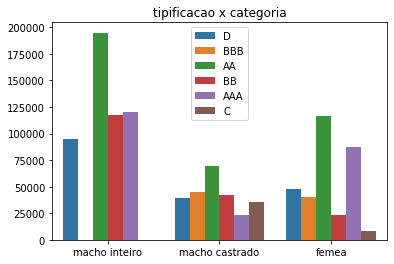

In [7]:
sns.countplot(df['tipificacao'],hue=df['categoria'], dodge=True)
plt.title('tipificacao x categoria')
plt.xlabel('')
plt.ylabel("")
plt.legend(loc='best')
plt.show()

### Visualizando principais valores estatísticos

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id_animal,1107689.0,553845.000000,319762.415500,1.0000,276923.0000,553845.0000,830767.0000,1.107689e+06
estabelecimento_identificador,1107689.0,3930.542337,2078.800073,1.0000,1712.0000,4412.0000,5351.0000,8.385000e+03
identificador_lote,1107689.0,48450.900951,23141.412472,2.0000,25602.0000,51291.0000,69966.0000,8.530800e+04
peso,1107689.0,267.845487,46.498924,102.0000,236.0000,271.5000,299.0000,1.566000e+03
classificacao_estabelecimento,1057853.0,24.481530,3.617385,21.0000,21.0000,26.0000,26.0000,3.000000e+01
tot7d_chuva,1040621.0,22.017195,30.156669,0.0000,0.7000,9.8000,32.9000,6.622000e+02
med7d_tempinst,1052429.0,24.178766,2.400317,13.1900,22.8300,24.2500,25.6700,3.507000e+01
med7d_tempmax,1051745.0,30.930234,2.558604,0.0000,29.3800,30.9900,32.5400,3.900000e+01
med7d_tempmin,1051745.0,19.002492,2.848329,0.0000,17.2900,19.2600,20.9200,3.277000e+01
med7d_umidinst,1052404.0,68.059538,9.648696,0.0000,62.5400,69.2000,74.7100,9.671000e+01


In [3]:
from scipy.stats import variation 

In [4]:
var = variation(df, axis=0)

TypeError: can only concatenate str (not "float") to str

In [ ]:
idmax = np.argmax(var)
print(idmax)

### 3.1 Dados ausentes

In [7]:
# porcentagem de valores ausentes em ordem decrescentes
round(df.isnull().mean() * 100,2).sort_values(ascending=False)

qual_alianca                         67.76
lista_trace                          53.96
erosao_laminar_ou_sulco_20           22.05
boa_cobertura_vegetal                22.05
med7d_evi                             7.19
med7d_ndvi                            7.19
med7d_num_pixels                      7.19
tot7d_chuva                           6.05
med7d_umidmin                         5.07
med7d_tempmax                         5.05
med7d_tempmin                         5.05
cnt7d_cl_ituinst                      5.05
med7d_formituinst                     5.05
cnt7d_cl_itumax                       5.05
med7d_formitumax                      5.05
med7d_umidmax                         5.00
med7d_umidinst                        4.99
med7d_tempinst                        4.99
med7d_velventomax                     4.93
regua_de_manejo                       4.50
bpa                                   4.50
participa_aliancas_mercadologicas     4.50
classificacao_estabelecimento         4.50
identificac

### 3.2 Possíveis outliers

In [ ]:
def plotarBoxplot (titulo,x, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    box_plot = sns.boxplot(x= x, data = dataset, orient = 'h')
    box_plot.figure.set_size_inches(21,4)
    box_plot.set_title(titulo, fontsize = 20)
    box_plot

In [ ]:
def limitesBoxplot(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    l_inferior = Q1 - (1.5 * IQR)
    l_superior = Q3 + (1.5 * IQR)
    print('Limite Superior: %.4f' % (max(x[x<l_superior])))
    print('Limite Inferior: %.4f' % (min(x[x>l_inferior])))

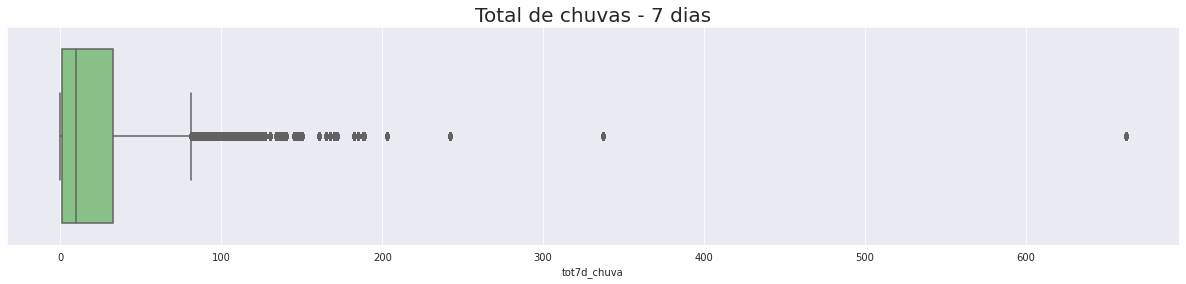

In [ ]:
plotarBoxplot('Total de chuvas - 7 dias', 'tot7d_chuva', df )

In [ ]:
limitesBoxplot(df["tot7d_chuva"])

Limite Superior: 80.8500
Limite Inferior: 0.0000


In [ ]:
len(df.query('tot7d_chuva > 80.8500'))

49152

In [ ]:
def plotarBoxplotAgrupado (titulo, xlabel, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    box_plot = sns.boxplot(x="variable", y="value", data=pd.melt(dataset))
    box_plot.set_xlabel(xlabel, fontsize=14)
    box_plot.figure.set_size_inches(20,10)
    box_plot.set_title(titulo, fontsize = 20)
    box_plot 

#### Dados de precipitações - Total de chuvas - média de 7 dias à 12 meses

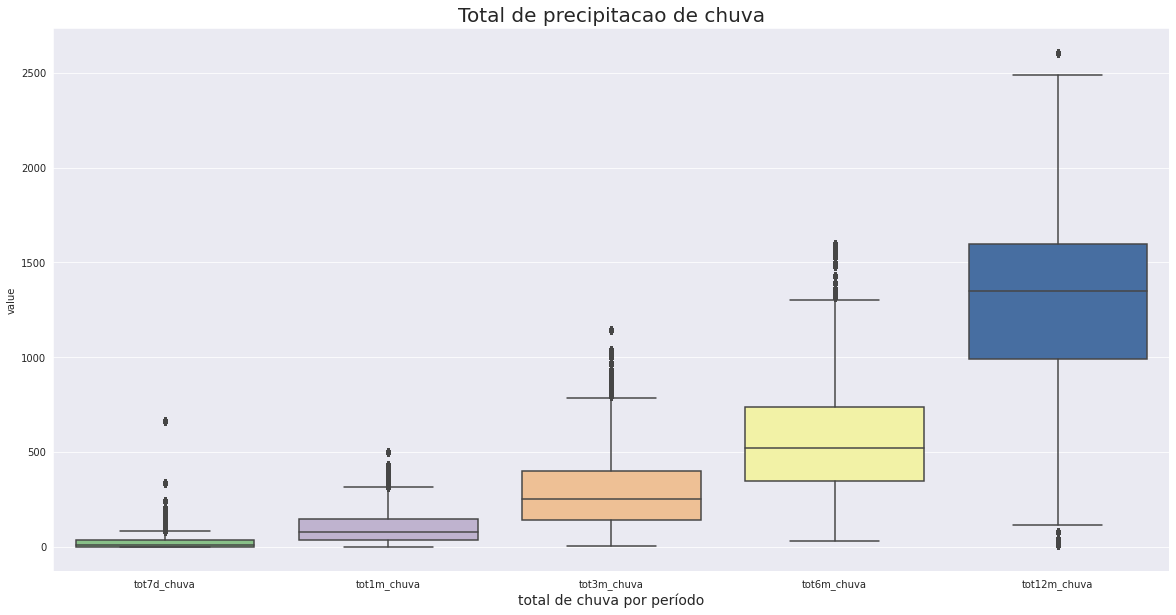

In [ ]:
plotarBoxplotAgrupado ('Total de precipitacao de chuva',
                       'total de chuva por período', 
                        pd.DataFrame(data = df, columns = ['tot7d_chuva','tot1m_chuva','tot3m_chuva', 'tot6m_chuva', 'tot12m_chuva']) )

#### Temperatura - média de 7 dias à 12 meses


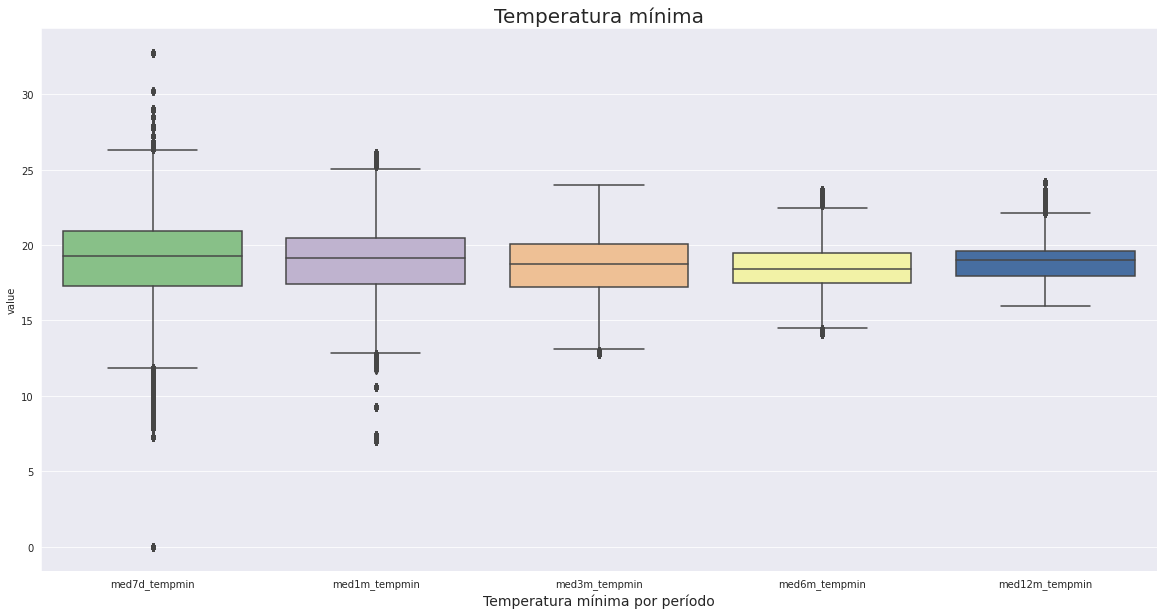

In [ ]:
plotarBoxplotAgrupado ('Temperatura mínima','Temperatura mínima por período', 
                       pd.DataFrame(data = df, columns = ['med7d_tempmin','med1m_tempmin','med3m_tempmin', 'med6m_tempmin', 'med12m_tempmin']) )

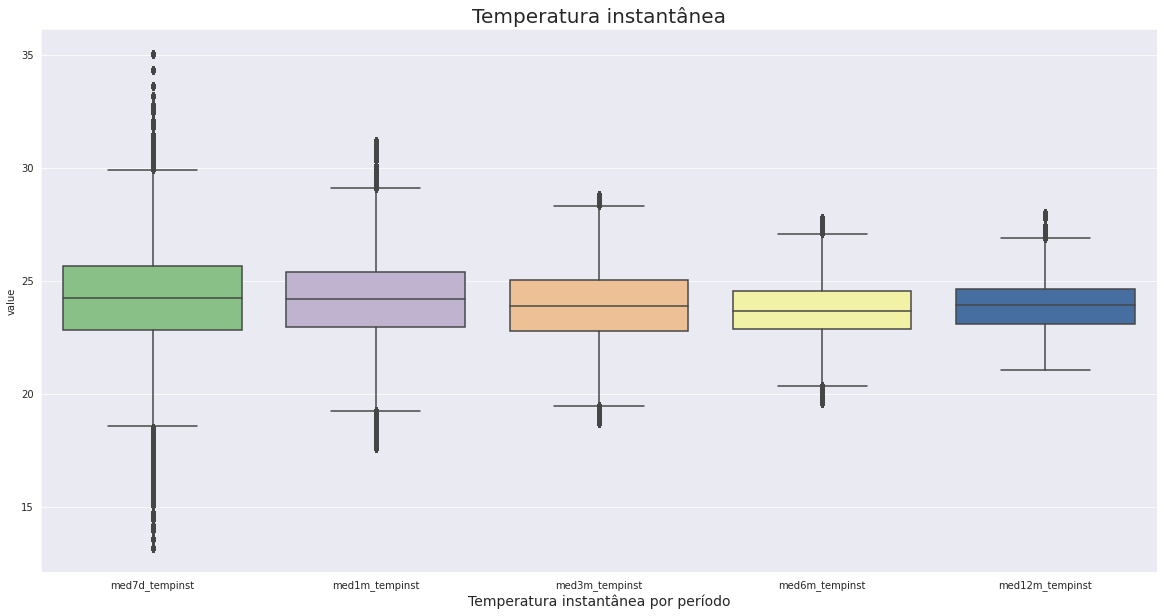

In [ ]:
plotarBoxplotAgrupado ('Temperatura instantânea','Temperatura instantânea por período', 
                       pd.DataFrame(data = df, columns = ['med7d_tempinst','med1m_tempinst','med3m_tempinst', 'med6m_tempinst', 'med12m_tempinst']) )

#### Umidade - média de 7 dias à 12 meses

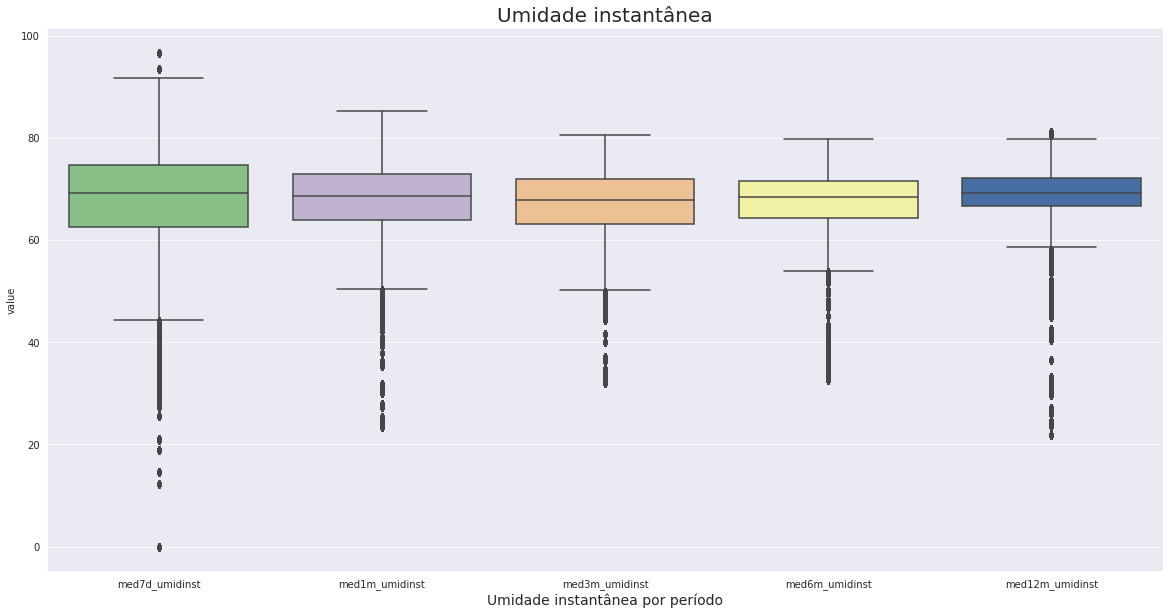

In [ ]:
plotarBoxplotAgrupado ('Umidade instantânea','Umidade instantânea por período', 
                       pd.DataFrame(data = df, columns = ['med7d_umidinst','med1m_umidinst','med3m_umidinst', 'med6m_umidinst', 'med12m_umidinst']))

#### Preço da arroba do boi - média de 7 dias à 12 meses

In [ ]:
df_pre_boi = pd.DataFrame(data = df, columns = ['med7d_prer_boi','med1m_prer_boi','med3m_prer_boi', 'med6m_prer_boi', 'med12m_prer_boi'])

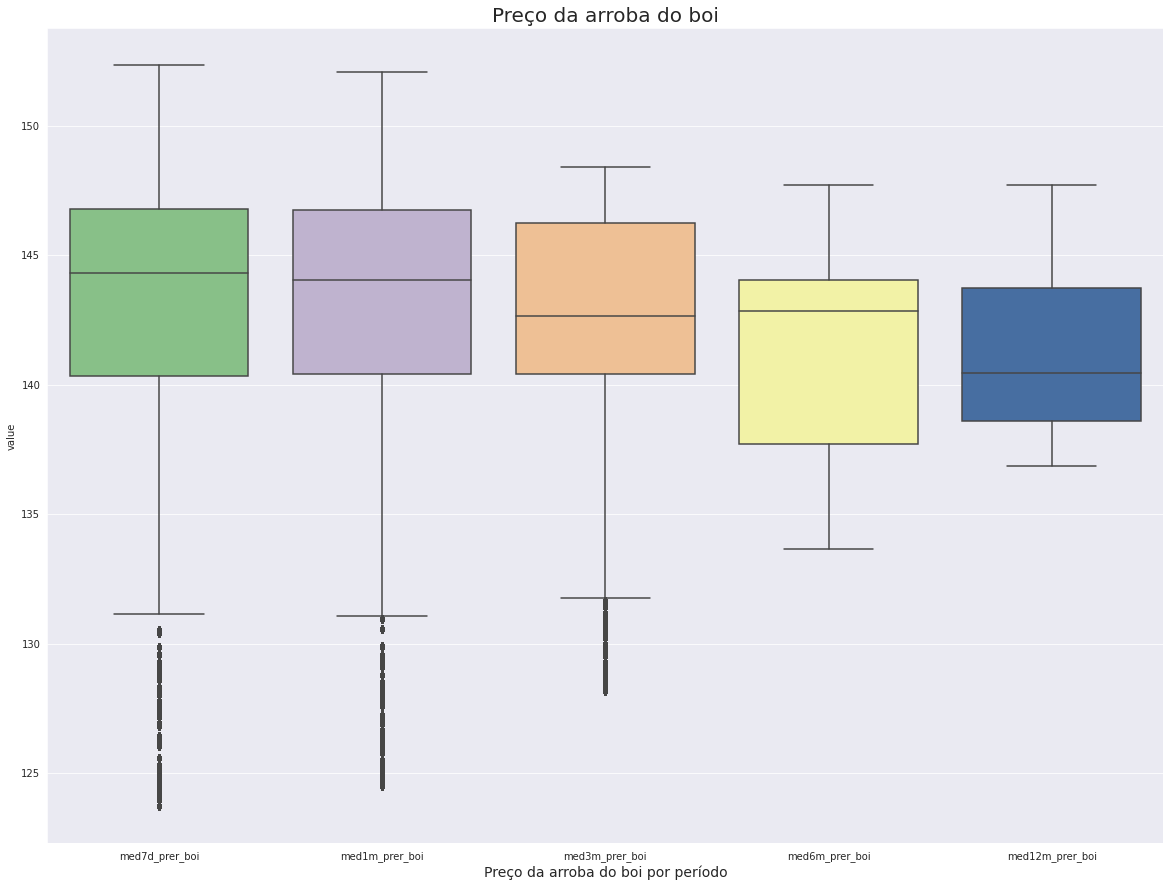

In [ ]:
plotarBoxplotAgrupado ('Preço da arroba do boi','Preço da arroba do boi por período', df_pre_boi )

#### Vento - média de 7 dias à 12 mesesVento 

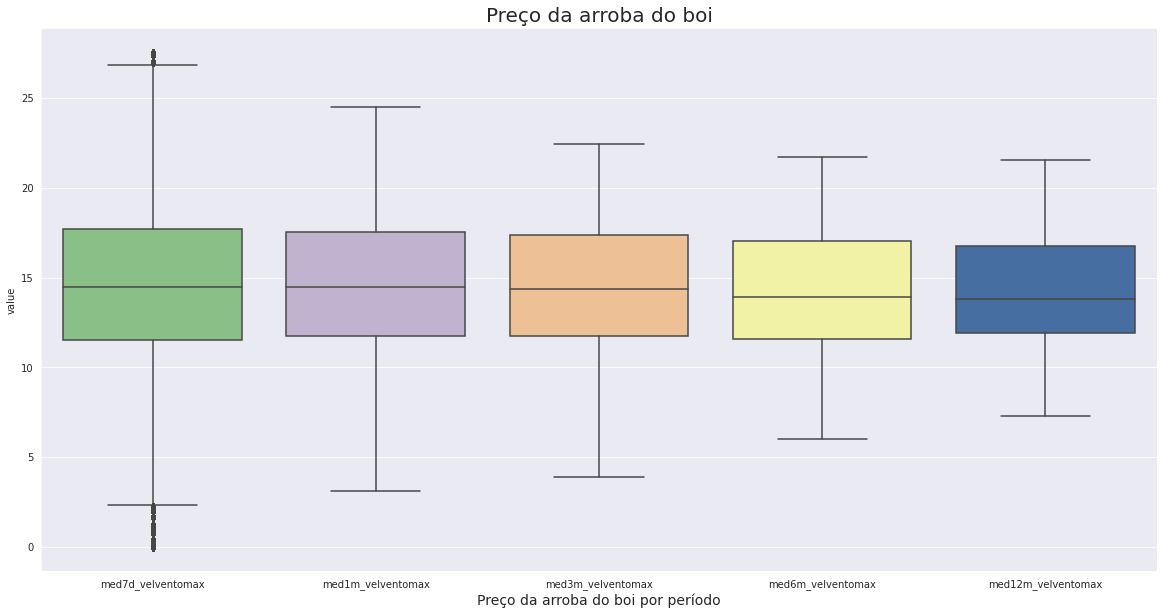

In [ ]:
plotarBoxplotAgrupado ('Preço da arroba do boi','Preço da arroba do boi por período',
                       pd.DataFrame(data = df, columns = ['med7d_velventomax','med1m_velventomax','med3m_velventomax', 'med6m_velventomax', 'med12m_velventomax']))

## Peso da carcaça

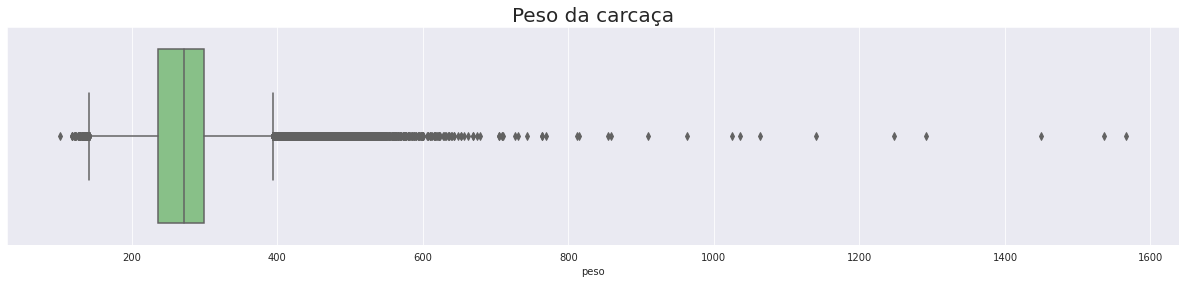

In [ ]:
plotarBoxplot ('Peso da carcaça', 'peso', df )

In [ ]:
limitesBoxplot(df.peso)

Limite Superior: 393.4000
Limite Inferior: 141.6000


### 3.3 Matriz de correlação

Para garantir melhor visualização as variáveis mensuradas por períodos diferentes não foram todas inclusas a matriz, foram considerados os registros referente ao período de mês

In [ ]:
selecao_mes = ['estabelecimento_municipio', 'data_abate',
       'tipificacao', 'maturidade', 'acabamento', 'peso',
       'motivo_desclassificacao', 'q_classificacao_estabel',
       'q_outros_incentiv', 'q_pratica_recuperacao_pa',
       'q_fertiirrigacao', 'q_ilp', 'q_ilpf', 'q_ifp', 'q_fabrica_racao',
       'q_identificacao_individual', 'q_regua_manejo', 'q_bpa',
       'q_aliancas_mercadolog', 'q_qual_alianca',
       'q_cobertura_vegetal_80_area', 'q_erosaoo_sulco_20_area',
       'q_sisbov', 'q_lista_trace', 'data12m', 'data6m', 'data3m',
       'data1m', 'data7d','tot1m_chuva', 'med1m_tempinst', 'med1m_tempmax', 
       'med1m_tempmin', 'med1m_umidinst', 'med1m_umidmax', 'med1m_umidmin', 
       'med1m_velventomax', 'med1m_formituinst', 'med1m_formitumax', 
       'med1m_num_pixels', 'med1m_ndvi', 'med1m_evi', 'med1m_prer_soja', 
       'med1m_prer_milho', 'med1m_prer_boi', 'cnt1m_cl_itumax', 'cnt1m_cl_ituinst', 'ano', 'categoria', 'classificacao']

In [ ]:
df_matriz= df[df.columns.intersection(selecao_mes)]

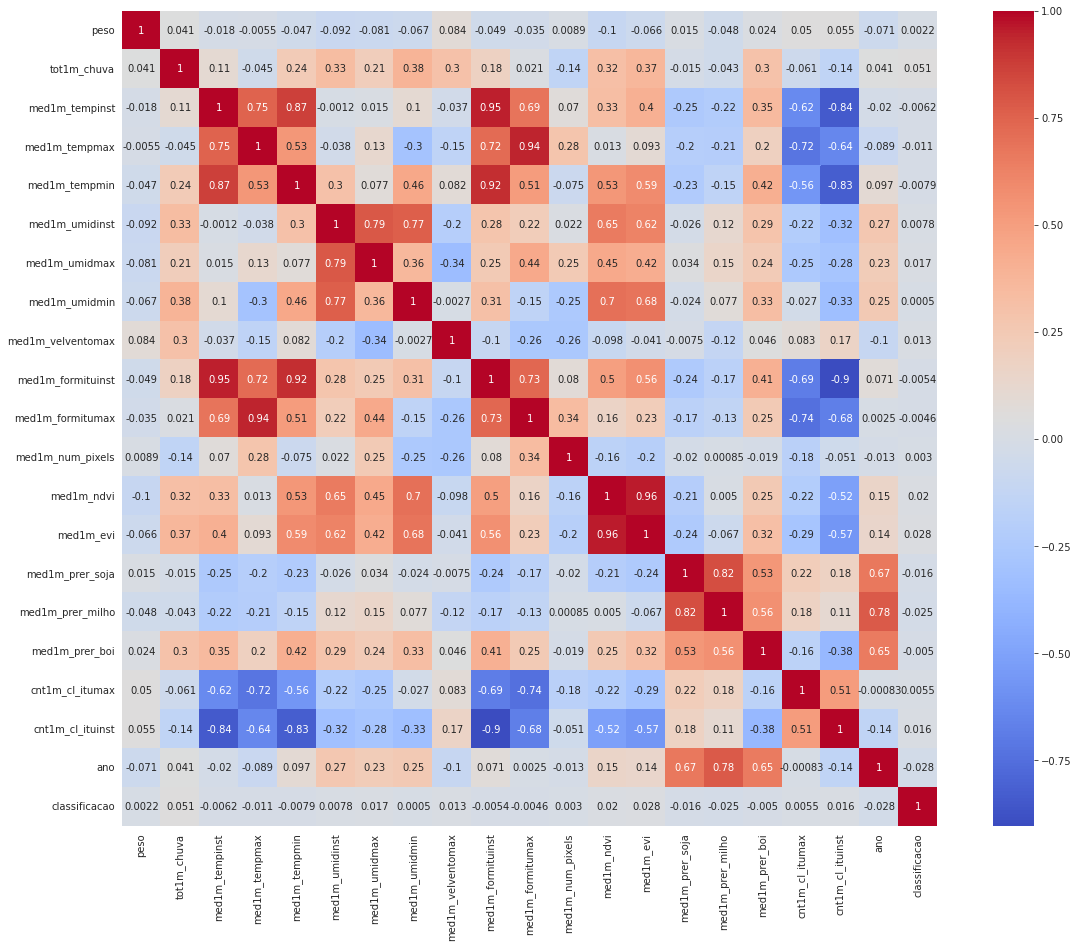

In [ ]:
plt.figure(figsize=(20,15)) 
sns_plot = sns.heatmap(data=df_matriz.corr(),annot=True,cmap='coolwarm', square=True);
fig = sns_plot.get_figure()
fig.savefig("Matriz_Corr_resumido.png")

Caracaterísticas com alta correlação:

<table style="width:100%">
  <tr>
    <th>Caracterísica 1</th>
    <th>Caracterísica 2</th>
    <th>Correlação</th>
  </tr>
  <tr>
    <td>Temperatura máxima (tempmax)</td>
    <td>Temperatura instantânea (tempinst)</td>
    <td>0,75</td>
  </tr>
  <tr>
    <td>Temperatura mínima (tempmin)</td>
    <td>Temperatura instantânea (tempinst)</td>
    <td>0,87</td>
  </tr>
  <tr>
    <td>Fórmula, índice de temperatura e umidade instantanea (formituinst)</td>
    <td>Temperatura instantânea (tempinst)</td>
    <td>0,95</td>
  </tr>
  <tr>
    <td>Fórmula, índice de temperatura e umidade instantanea (formituinst)</td>
    <td>Temperatura máxima (tempmax)</td>
    <td>0,72</td>
  </tr>
  <tr>
    <td>Fórmula, índice de temperatura e umidade maxima (formitumax)</td>
    <td>Temperatura máxima (tempmax)</td>    
    <td>0,94</td>
  </tr>
  <tr>
    <td>Classe na qual o ITU máximo se encontra (cl_itumax)</td>
    <td>Temperatura máxima (tempmax)</td>    
    <td>0,72</td>
  </tr>
  <tr>
    <td>Fórmula, índice de temperatura e umidade instantânea (formituinst)</td>
    <td>Temperatura mínima (tempmin)</td>
    <td>0,92</td>
  </tr>
  <tr>
    <td>Umidade máxima (umidmax)</td>
    <td>Umidade instantânea do ar (umidinst)</td>    
    <td>0,79</td>
  </tr>
  <tr>
    <td>Umidade mínima do ar (umidmin)</td>
    <td>Umidade instantânea do ar (umidinst)</td>
    <td>0,77</td>
  </tr>
  <tr>
    <td>Fórmula, índice de temperatura e umidade instantânea (formituinst)</td>
    <td>Fórmula, índice de temperatura e umidade maxima (fomitumax)</td>
    <td>0,73</td>
  </tr>
  <tr>
    <td>Classe na qual o ITU máximo se encontra (cl_itumax)</td>
    <td>Fórmula, índice de temperatura e umidade máxima (formituimax)</td>    
    <td>0,74</td>
  </tr>
  <tr>
    <td>Índice de Vegetação da Diferença Normalizada (ndvi)</td>
    <td>Índice de Vegetação Melhorado (evi)</td>
    <td>0,96</td>
  </tr>
  <tr>
    <td>Preço da Soja (prer_soja)</td>
    <td>Preço do milho (prer_milho)</td>
    <td>0,82</td>
  </tr>
</table>



## 4. Características preditoras

### Categoria

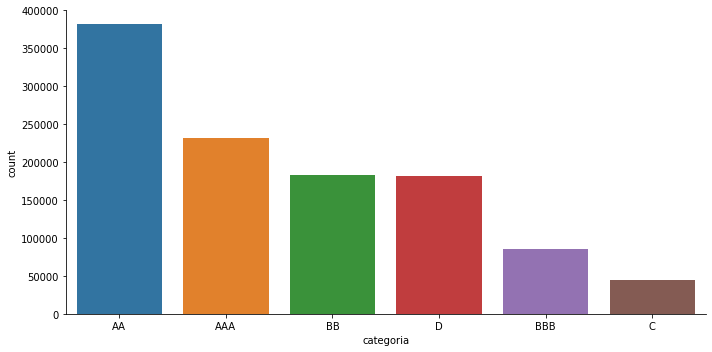

In [ ]:
categorias = df.categoria.value_counts()
sns.catplot(x = "categoria", data = df, 
            kind="count", 
            aspect=2,
            order = categorias.index)

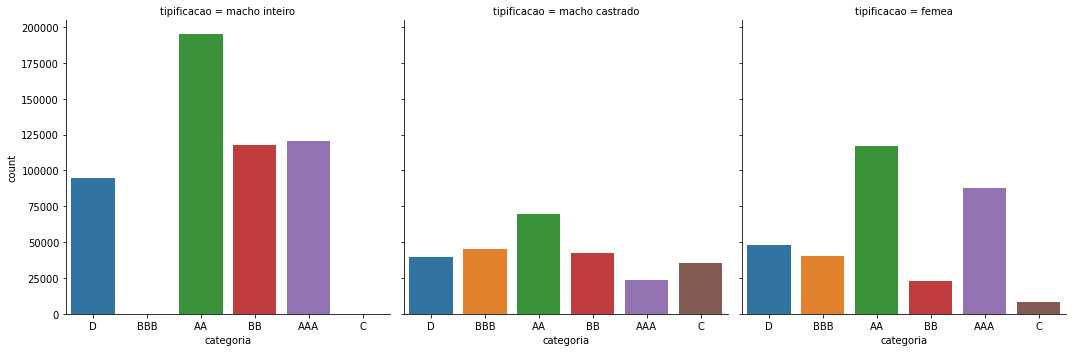

In [ ]:
g = sns.catplot(x="categoria",  col="tipificacao",
                data=df, 
                kind="count", ci=None, aspect=1)

### Peso

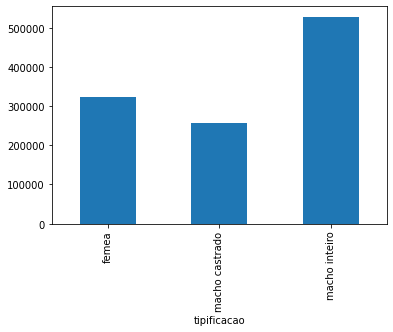

In [ ]:
df.groupby(['tipificacao']).size().plot(kind = "bar")

In [ ]:
print('Descrição da característica Peso')
df['peso'].describe()

Descrição da característica Peso


count    1.107689e+06
mean     2.678455e+02
std      4.649892e+01
min      1.020000e+02
25%      2.360000e+02
50%      2.715000e+02
75%      2.990000e+02
max      1.566000e+03
Name: peso, dtype: float64

In [ ]:
df.tipificacao.value_counts()

macho inteiro     528127
femea             324069
macho castrado    255493
Name: tipificacao, dtype: int64

### Descrição da característica Peso por tipificação

Tipificação macho inteiro

In [ ]:
df.query('tipificacao == "macho inteiro"').peso.describe()

count    528127.000000
mean        292.103145
std          34.411202
min         121.800000
25%         268.600000
50%         289.500000
75%         312.600000
max        1140.000000
Name: peso, dtype: float64

Tipificação macho fêmea

In [ ]:
df.query('tipificacao == "femea"').peso.describe()

count    324069.000000
mean        216.641787
std          30.725908
min         102.000000
25%         195.200000
50%         211.500000
75%         233.400000
max        1449.000000
Name: peso, dtype: float64

Tipificação macho castrado

In [ ]:
df.query('tipificacao == "macho castrado"').peso.describe()

count    255493.000000
mean        282.649837
std          31.108937
min         134.000000
25%         261.800000
50%         279.200000
75%         300.000000
max        1566.000000
Name: peso, dtype: float64